<a href="https://colab.research.google.com/github/Abdulrahmann-Omar/Abdulrahmann-Omar/blob/main/Fraud_Detection_With_Various_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Importing

In [ ]:
pip install imbalanced-learn

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import accuracy_score, confusion_matrix
from imblearn.over_sampling import SMOTE
from collections import Counter

# **Data Exploration and Preprocessing**

In [ ]:
data = pd.read_csv('/content/creditcard.csv')

In [ ]:
data.head()

Time        V1        V2        V3        V4        V5        V6        V7  \
0     0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1     0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2     1 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3     1 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4     2 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28  Amount  Class  
0 -0.189115  0.133558 -0.021053  149.62    0.0  
1  0.125895 -0.008983  0.014724    2.69    0.0  
2 -0.139097 -0.055353 -0.059752  378.66    0.0  
3 -0.221929  0.062723  0.061458  123.50    0.0  
4  0.502292  0.219422  0.215153   69.99    0.0  

[5 rows x 31 columns]

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81299 entries, 0 to 81298
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    81299 non-null  int64  
 1   V1      81299 non-null  float64
 2   V2      81299 non-null  float64
 3   V3      81299 non-null  float64
 4   V4      81299 non-null  float64
 5   V5      81299 non-null  float64
 6   V6      81298 non-null  float64
 7   V7      81298 non-null  float64
 8   V8      81298 non-null  float64
 9   V9      81298 non-null  float64
 10  V10     81298 non-null  float64
 11  V11     81298 non-null  float64
 12  V12     81298 non-null  float64
 13  V13     81298 non-null  float64
 14  V14     81298 non-null  float64
 15  V15     81298 non-null  float64
 16  V16     81298 non-null  float64
 17  V17     81298 non-null  float64
 18  V18     81298 non-null  float64
 19  V19     81298 non-null  float64
 20  V20     81298 non-null  float64
 21  V21     81298 non-null  float64
 22

In [ ]:
data.describe()

Time            V1            V2            V3            V4  \
count  81299.000000  81299.000000  81299.000000  81299.000000  81299.000000   
mean   37671.743256     -0.259996     -0.038228      0.678460      0.163041   
std    15321.247892      1.887739      1.677855      1.382087      1.367118   
min        0.000000    -56.407510    -72.715728    -33.680984     -5.172595   
25%    30955.500000     -1.021634     -0.601906      0.185895     -0.726028   
50%    40336.000000     -0.252322      0.068932      0.764270      0.182495   
75%    49589.000000      1.153522      0.720881      1.393621      1.043485   
max    58874.000000      1.960497     18.902453      4.226108     16.715537   

                 V5            V6            V7            V8            V9  \
count  81299.000000  81298.000000  81298.000000  81298.000000  81298.000000   
mean      -0.277528      0.095578     -0.114114      0.053131     -0.012674   
std        1.382636      1.305288      1.246442      1.231140      1.142073   
min      -42.147898    -26.160506    -31.764946    -73.216718     -9.283925   
25%       -0.896884     -0.643360     -0.604699     -0.141178     -0.687309   
50%       -0.310828     -0.154462     -0.074285      0.069278     -0.091005   
75%        0.257899      0.490814      0.415927      0.350061      0.618942   
max       34.801666     22.529298     36.677268     20.007208     10.392889   

       ...           V21           V22           V23           V24  \
count  ...  81298.000000  81298.000000  81298.000000  81298.000000   
mean   ...     -0.029409     -0.105077     -0.038051      0.008223   
std    ...      0.737507      0.635892      0.631322      0.595555   
min    ...    -34.830382    -10.933144    -26.751119     -2.836627   
25%    ...     -0.224303     -0.524088     -0.178483     -0.322792   
50%    ...     -0.058369     -0.080165     -0.050332      0.064261   
75%    ...      0.117966      0.310638      0.080561      0.405520   
max    ...     22.614889     10.503090     18.946734      4.014444   

                V25           V26           V27           V28        Amount  \
count  81298.000000  81298.000000  81298.000000  81298.000000  81298.000000   
mean       0.134608      0.026078      0.002159      0.002203     98.097815   
std        0.441342      0.497671      0.391031      0.331337    269.610109   
min       -7.495741     -2.534330     -9.390980     -9.617915      0.000000   
25%       -0.129273     -0.326681     -0.063311     -0.005871      7.680000   
50%        0.173145     -0.073286      0.009301      0.022864     26.990000   
75%        0.421925      0.306915      0.082382      0.075978     89.715000   
max        5.525093      3.517346     12.152401     33.847808  19656.530000   

              Class  
count  81298.000000  
mean       0.002435  
std        0.049291  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        0.000000  
max        1.000000  

[8 rows x 31 columns]

In [ ]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        1
V7        1
V8        1
V9        1
V10       1
V11       1
V12       1
V13       1
V14       1
V15       1
V16       1
V17       1
V18       1
V19       1
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64

In [ ]:
data.fillna(data.mean(), inplace=True)

In [ ]:
data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [ ]:
data.duplicated().sum()

305

In [ ]:
data.drop_duplicates(inplace=True)

# **Exploratory Data Analysis - EDA**

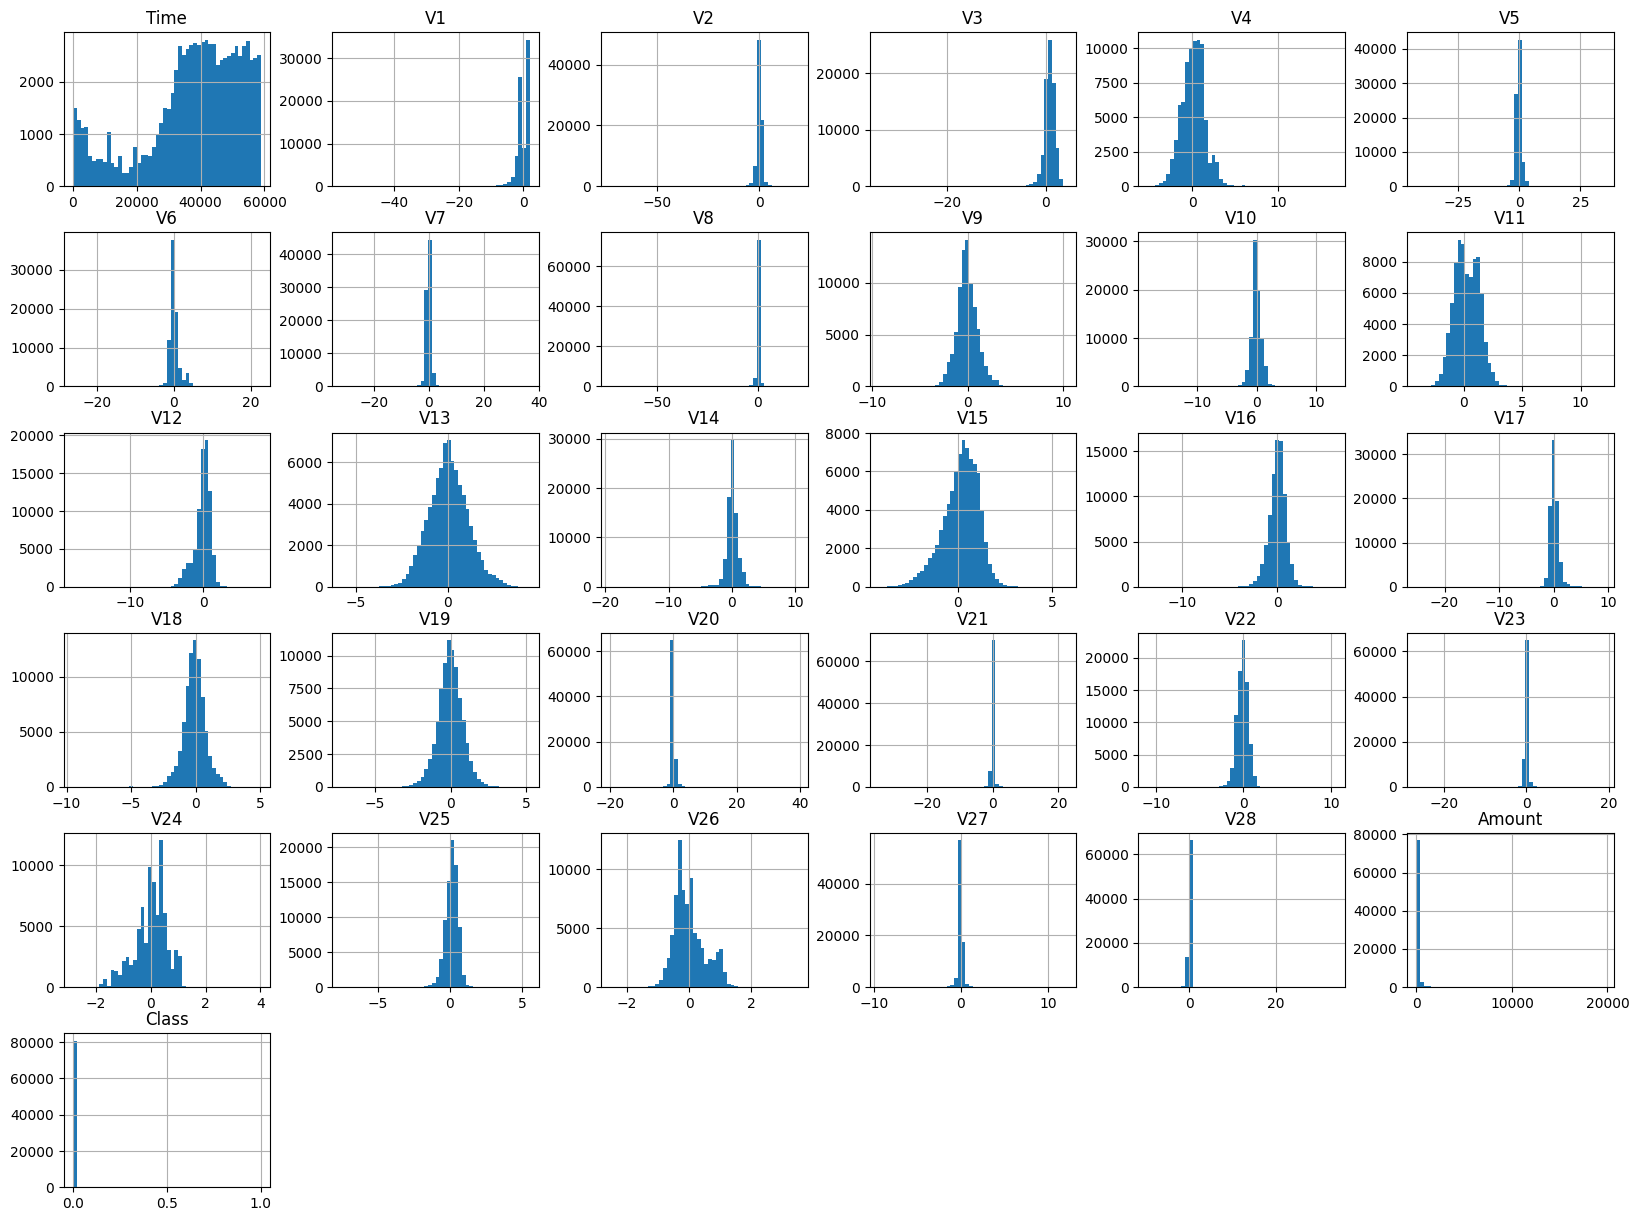

In [ ]:
data.hist(bins=50, figsize=(20,15))
plt.show()

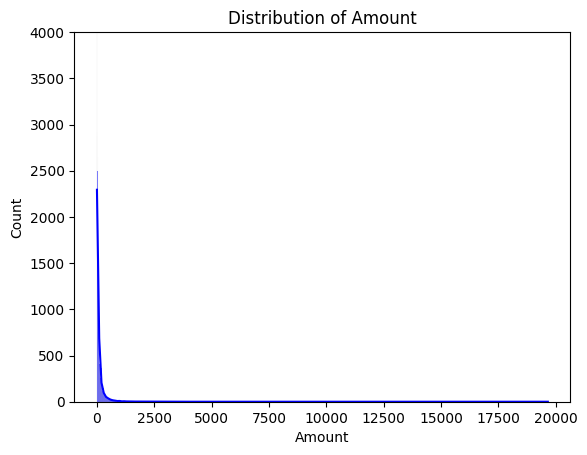

In [ ]:
sns.histplot(data['Amount'], kde=True, color='blue')
plt.title('Distribution of Amount')
plt.ylim(0, 4000)
plt.show()

*Boxplots*

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:718: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


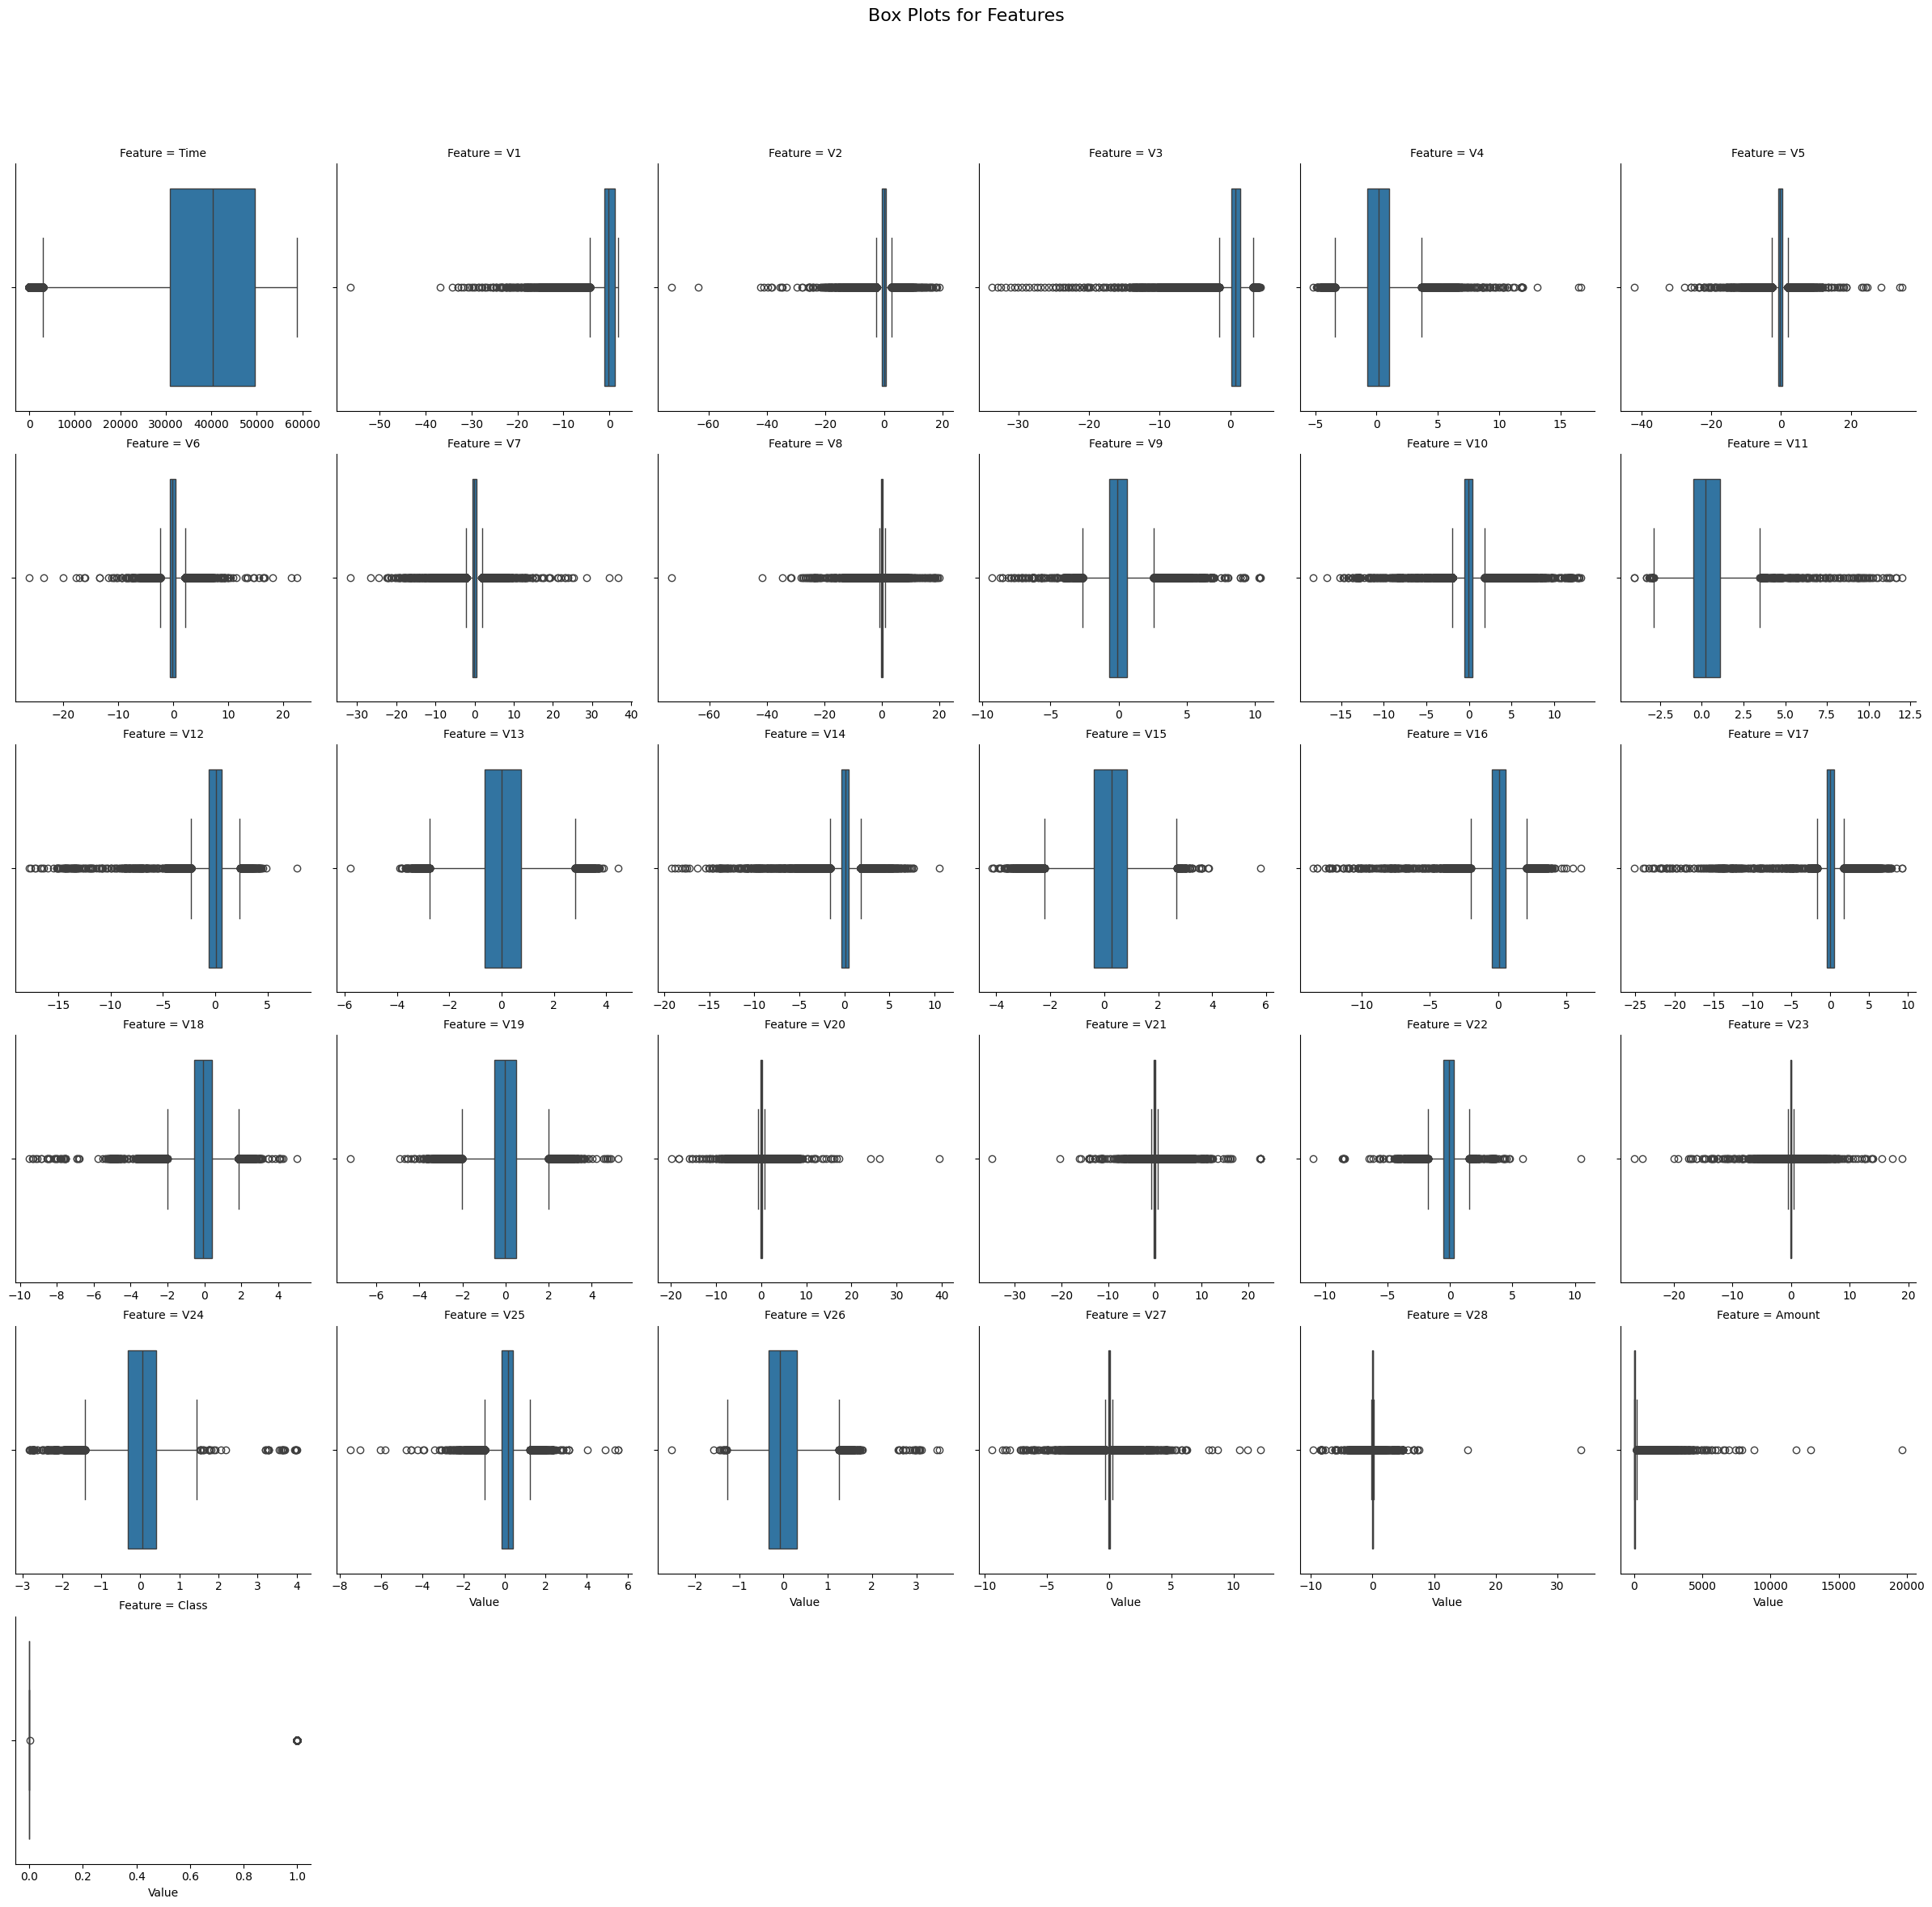

In [ ]:
col = data.columns
melted_data = data[col].melt(var_name='Feature', value_name='Value')
graph= sns.FacetGrid(melted_data, col="Feature", col_wrap=6, height=4, sharex=False, sharey=False)
graph.map(sns.boxplot, "Value")
graph.fig.subplots_adjust(top=0.9)
graph.fig.suptitle("Box Plots for Features", fontsize=16)
plt.show()

*Scatter Plot*

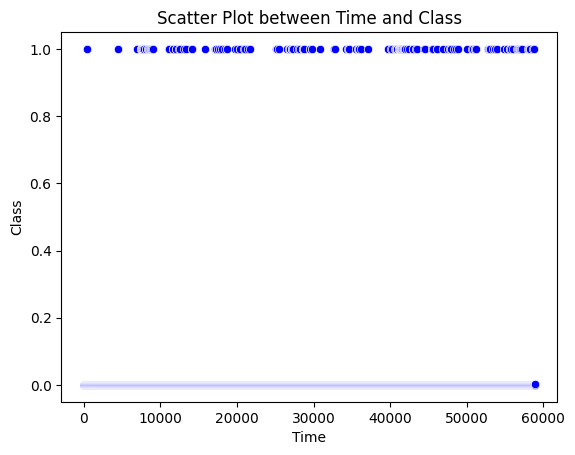

In [ ]:
sns.scatterplot(x=data['Time'], y=data['Class'], color='blue')
plt.title("Scatter Plot between Time and Class")
plt.xlabel("Time")
plt.ylabel("Class")
plt.show()

*Analyze the relationship between properties and Class*

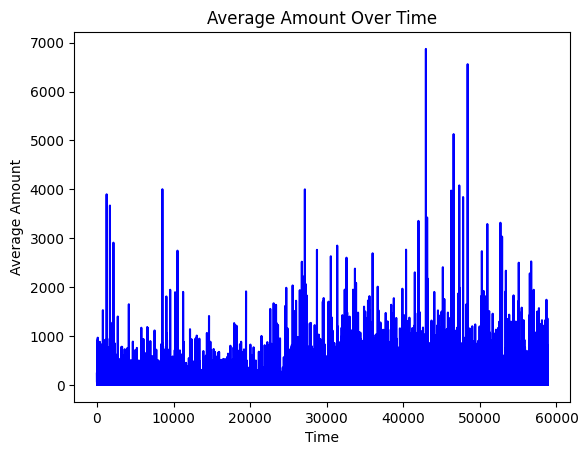

In [ ]:
data_grouped = data.groupby('Time')['Amount'].mean().reset_index()
sns.lineplot(x=data_grouped['Time'], y=data_grouped['Amount'], color='blue')
plt.title("Average Amount Over Time")
plt.xlabel("Time")
plt.ylabel("Average Amount")
plt.show()


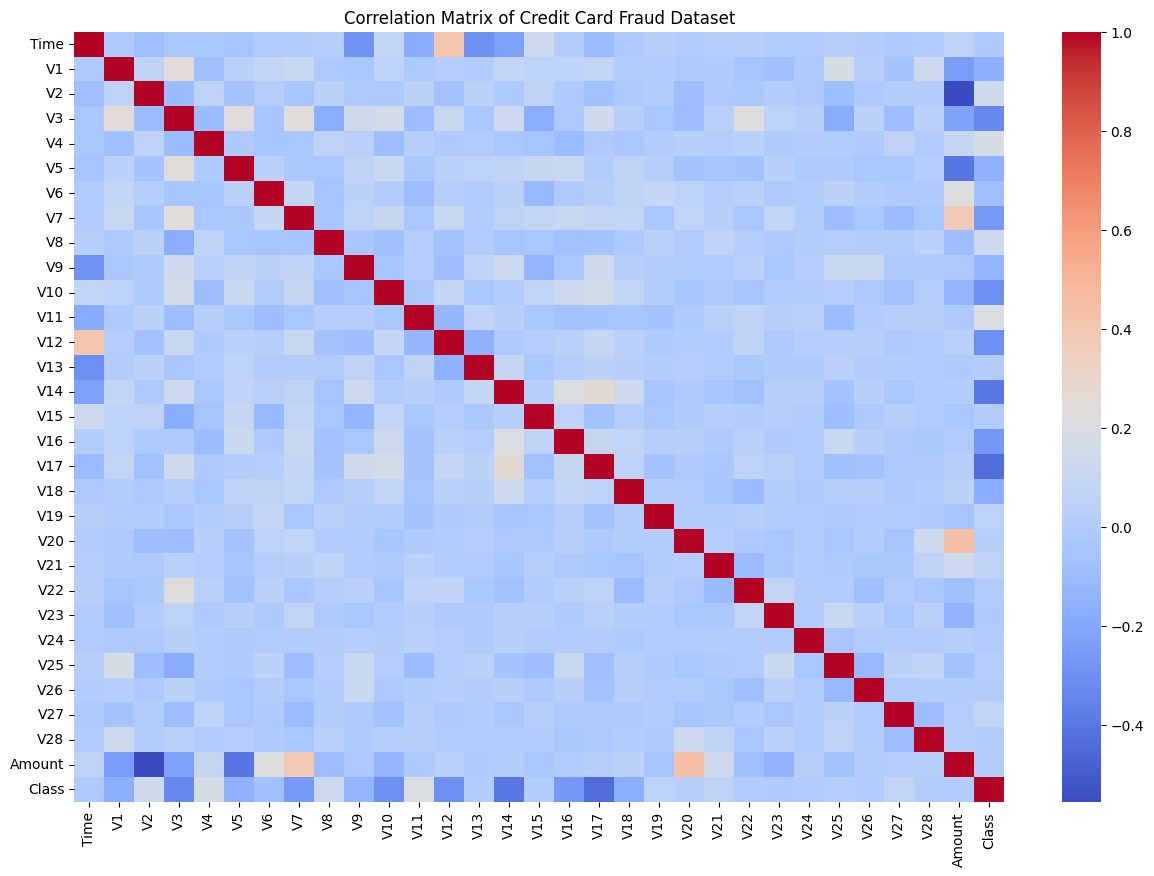

In [ ]:
correlation_matrix = data.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=False, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix of Credit Card Fraud Dataset")
plt.show()

*Add new features*


*Calculate the normalization of amounts*

In [ ]:
data['Normalized_Amount'] = data['Amount'] / data['Amount'].max()

*Calculate categories of amounts, such as Small, Medium, and Large*

In [ ]:
bins = [0, 50, 200, 20000]
labels = ['Small', 'Medium', 'Large']
data['Amount_Bucket'] = pd.cut(data['Amount'], bins=bins, labels=labels)

*Calculate the interaction between Amount and Class*

In [ ]:
data['Amount_Class'] = data['Amount'] * data['Class']

# **Splitting and SMOTE**

In [ ]:
data['Class'] = data['Class'].astype(int)

In [ ]:
x = data[['Amount', 'Time']]
y = data['Class']
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

*Smote*

In [ ]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [ ]:
print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", y_train_resampled .value_counts())

Before SMOTE: Class
0    64632
1      163
Name: count, dtype: int64
After SMOTE: Class
0    64632
1    64632
Name: count, dtype: int64


In [ ]:
for column in data.select_dtypes(include=np.number).columns:
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

# **Model Implementation**

###*KNN Model*

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=15)
knn_model.fit(X_train_resampled, y_train_resampled)


KNeighborsClassifier(n_neighbors=15)

In [ ]:
y_pred = knn_model.predict(X_test)

In [ ]:
acc = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

In [ ]:
print(f"Accuracy: {acc}")
print(f"F1 Score: {f1}")
print(f"Recall: {recall}")
print(f"ROC AUC Score: {roc_auc}")

Accuracy: 0.8365948515340453
F1 Score: 0.010467289719626169
Recall: 0.4
ROC AUC Score: 0.6187701064093046


###*Logistic Regression Model*

In [ ]:
log_reg = LogisticRegression()
log_reg.fit(X_train_resampled, y_train_resampled)

LogisticRegression()

In [ ]:
y_pred_log = log_reg.predict(X_test)

In [ ]:
accuracy_logistic = accuracy_score(y_test, y_pred_log )
precision_logistic  = precision_score(y_test, y_pred_log )
recall_logistic  = recall_score(y_test, y_pred_log )
f1_logistic  = f1_score(y_test, y_pred_log )
roc_auc_logistic = roc_auc_score(y_test, y_pred_log )

In [ ]:
print(f"Logistic Regression Accuracy: {accuracy_logistic }")
print(f"Logistic Regression Precision: {precision_logistic }")
print(f"Logistic Regression Recall: {recall_logistic }")
print(f"Logistic Regression F1 Score: {f1_logistic }")
print(f"Logistic Regression ROC AUC Score: {roc_auc_logistic}")

Logistic Regression Accuracy: 0.6279399962960677
Logistic Regression Precision: 0.002325581395348837
Logistic Regression Recall: 0.4
Logistic Regression F1 Score: 0.004624277456647399
Logistic Regression ROC AUC Score: 0.5142167780252412


In [ ]:
results = []

results.append({
    "Model": "K-Nearest Neighbors ",
    "Accuracy": acc,
    "roc_auc": roc_auc,
    "Recall": recall,
    "F1-Score": f1,

})

results.append({
    "Model": "Logistic Regression",

    "Accuracy": accuracy_logistic,
    "Precision": precision_logistic,
    "Recall": recall_logistic,
    "F1-Score": f1_logistic,
    "roc_auc": roc_auc_logistic,
})

results_df = pd.DataFrame(results)
results_df

Model  Accuracy   roc_auc  Recall  F1-Score  Precision
0  K-Nearest Neighbors   0.997722  0.500000     0.0  0.000000        NaN
1   Logistic Regression  0.647472  0.573904     0.5  0.006421   0.003231

###*Compare the performance of different models and select the best-performing one.*

In [ ]:
best_classification_model = results_df[results_df["Accuracy"] != "NaN"].sort_values("F1-Score", ascending=False).iloc[0]
print("Best Classification Model:")
print(best_classification_model)

Best Classification Model:
Model        Logistic Regression
Accuracy                0.647472
roc_auc                 0.573904
Recall                       0.5
F1-Score                0.006421
Precision               0.003231
Name: 1, dtype: object


## **Grid SearchVC**

### **NN**

In [ ]:
# Hyperparameter Tuning with Grid Search for Neural Network
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'hidden_layer_sizes': [(50,), (100,)],
    'activation': ['relu'],
    'solver': ['adam'],
    'learning_rate': ['constant'],
    'max_iter': [200]
}

mlp = MLPClassifier(random_state=42)
grid_search_nn = GridSearchCV(estimator=mlp, param_grid=param_grid, cv=3, scoring='accuracy', verbose=2, n_jobs=-1)
grid_search_nn.fit(X_train_scaled, y_train)

print("Best Parameters for Neural Network:", grid_search_nn.best_params_)
print("Best Score:", grid_search_nn.best_score_)


Fitting 3 folds for each of 2 candidates, totalling 6 fits
Best Parameters for Neural Network: {'activation': 'relu', 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'max_iter': 200, 'solver': 'adam'}
Best Score: 0.9236391353283929


In [ ]:
best_nn = grid_search_nn.best_estimator_

# Use the best model from GridSearchCV to make predictions on the test set
y_pred_test = best_nn.predict(X_test_scaled)

# Save predictions to CSV
submission = pd.DataFrame({
    'ID': range(len(y_pred_test)),
    'Prediction': y_pred_test
})

# Save the predictions to a CSV file
submission.to_csv('submission_NN_GS_test.csv', index=False)

### **Decision Tree**

In [ ]:
param_grid = {
    'criterion': ['gini'],
    'max_depth': [10, 20],
    'min_samples_split': [5, 10]
}

dt = DecisionTreeClassifier(random_state=42)
grid_search_dt = GridSearchCV(estimator=dt, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search_dt.fit(X_train_scaled, y_train)

print("Best Parameters for Decision Tree:", grid_search_dt.best_params_)
print("Best Score:", grid_search_dt.best_score_)

Fitting 3 folds for each of 4 candidates, totalling 12 fits
Best Parameters for Decision Tree: {'criterion': 'gini', 'max_depth': 20, 'min_samples_split': 5}
Best Score: 0.6689128836230958


In [ ]:
# Get the best model from GridSearchCV
best_dt = grid_search_dt.best_estimator_

# Make predictions on the test set
y_pred_DT_GS = best_dt.predict(X_test_scaled)

# Create a DataFrame for the submission
submission_dt = pd.DataFrame({
    'ID': range(len(y_pred_DT_GS)),
    'Prediction': y_pred_DT_GS
})

# Save the predictions to a CSV file
submission_dt.to_csv('submission_DT_GS.csv', index=False)

print("Submission file created: submission_DT_GS.csv")


Submission file created: submission_DT_GS.csv


### **RandomForest**

In [ ]:
# Define a parameter grid  search
param_grid = {
    'n_estimators': [50],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2],
    'criterion': ['gini']
}

rf = RandomForestClassifier(random_state=42)

# GridSearchCV with fewer cross-validation folds and parallel processing
grid_search_rf = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=3,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

# Fit the model
grid_search_rf.fit(X_train_scaled, y_train)

# Output the best parameters and score
print("Best Parameters for Random Forest:", grid_search_rf.best_params_)
print("Best Score:", grid_search_rf.best_score_)


Fitting 3 folds for each of 3 candidates, totalling 9 fits
Best Parameters for Random Forest: {'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 50}
Best Score: 0.8785289666773922


In [ ]:
# Make predictions on the test set
y_pred_rf = grid_search_rf.best_estimator_.predict(X_test_scaled)

# Create a DataFrame for the submission
submission = pd.DataFrame({
    'ID': range(len(y_pred_rf)),
    'Prediction': y_pred_rf
})

# Save the submission to a CSV file
submission.to_csv('submission_RF_GS.csv', index=False)

print("Submission file saved successfully.")


Submission file saved successfully.


## **RandomizedSearchCV**

### **NN**

In [ ]:
# Define a  hyperparameter space  search
param_distributions = {
    'hidden_layer_sizes': [(50,)],
    'activation': ['relu'],
    'solver': ['adam'],
    'alpha': np.logspace(-4, 0, 3),
    'learning_rate': ['constant'],
    'max_iter': [100]
}

mlp = MLPClassifier(random_state=42)

# Instantiate RandomizedSearchCV with fewer iterations and folds
random_search_nn = RandomizedSearchCV(
    estimator=mlp,
    param_distributions=param_distributions,
    n_iter=10,
    scoring='accuracy',
    cv=2,
    random_state=42,
    verbose=1,
    n_jobs=-1
)

# Fit RandomizedSearchCV
random_search_nn.fit(X_train_scaled, y_train)

print("Best Parameters for Neural Network:", random_search_nn.best_params_)
print("Best Score:", random_search_nn.best_score_)


Fitting 2 folds for each of 3 candidates, totalling 6 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 3 is smaller than n_iter=10. Running 3 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best Parameters for Neural Network: {'solver': 'adam', 'max_iter': 100, 'learning_rate': 'constant', 'hidden_layer_sizes': (50,), 'alpha': 1.0, 'activation': 'relu'}
Best Score: 0.8520951234408815


In [ ]:
# Get the best model from RandomizedSearchCV
best_nn = random_search_nn.best_estimator_

# Make predictions on the test data
y_pred_nn = best_nn.predict(X_test_scaled)

# Create a DataFrame with predictions
submission_nn = pd.DataFrame({
    'ID': range(len(y_pred_nn)),
    'Prediction': y_pred_nn
})

# Save the results to a CSV file for submission
submission_nn.to_csv('submission_NN_RS.csv', index=False)


### **DecisionTree**

In [ ]:
# Define a  hyperparameter space search
param_distributions = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [10, 20, 30, 50],
    'min_samples_split': np.arange(2, 21, 2),
    'min_samples_leaf': np.arange(1, 21, 1),
    'max_features': ['sqrt', 'log2']
}

dt = DecisionTreeClassifier(random_state=42)

# Instantiate RandomizedSearchCV with reduced iterations and folds
random_search_dt = RandomizedSearchCV(
    estimator=dt,
    param_distributions=param_distributions,
    n_iter=20,
    scoring='accuracy',
    cv=3,
    random_state=42,
    verbose=1,
    n_jobs=-1
)

# Fit RandomizedSearchCV
random_search_dt.fit(X_train_scaled, y_train)

print("Best Parameters for Decision Tree:", random_search_dt.best_params_)
print("Best Score:", random_search_dt.best_score_)


Fitting 3 folds for each of 20 candidates, totalling 60 fits
Best Parameters for Decision Tree: {'min_samples_split': 10, 'min_samples_leaf': 10, 'max_features': 'sqrt', 'max_depth': 50, 'criterion': 'gini'}
Best Score: 0.9532768507278687


In [ ]:
# Get the best model from RandomizedSearchCV
best_dt = random_search_dt.best_estimator_

# Make predictions on the test data
y_pred_dt = best_dt.predict(X_test_scaled)

# Prepare the submission dataframe
import pandas as pd

submission = pd.DataFrame({
    'ID': range(len(y_pred_dt)),
    'Prediction': y_pred_dt
})

# Save the results to a CSV file for Kaggle submission
submission.to_csv('submission_DT_RS.csv', index=False)

print("Submission file 'submission_DT_RS.csv' has been created.")


Submission file 'submission_DT_RS.csv' has been created.


### **RandomForest**

In [ ]:
# Define a  hyperparameter space  search
param_distributions = {
    'n_estimators': [100],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'criterion': ['gini'],
    'max_features': ['sqrt']
}

rf = RandomForestClassifier(random_state=42)

# Instantiate RandomizedSearchCV with reduced iterations and folds
random_search_rf = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_distributions,
    n_iter=10,
    scoring='accuracy',
    cv=2,
    random_state=42,
    verbose=1,
    n_jobs=-1
)

# Fit RandomizedSearchCV
random_search_rf.fit(X_train_scaled, y_train)

# Output the best parameters and score
print("Best Parameters for Random Forest:", random_search_rf.best_params_)
print("Best Score:", random_search_rf.best_score_)

Fitting 2 folds for each of 1 candidates, totalling 2 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 1 is smaller than n_iter=5. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best Parameters for Random Forest: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 10, 'criterion': 'gini'}
Best Score: 0.5113308596908065


In [ ]:
# Get the best Random Forest model from the random search
best_rf = random_search_rf.best_estimator_

# Make predictions on the test data
y_pred_RF = best_rf.predict(X_test_scaled)

# Create a DataFrame with the predictions
submission = pd.DataFrame({
    'ID': range(len(y_pred_RF)),
    'Prediction': y_pred_RF
})

# Save the results to a CSV file
submission.to_csv('submission_RF_RS.csv', index=False)


# **VOTING**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# data scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the models
dt = DecisionTreeClassifier(random_state=42, max_depth=10)
rf = RandomForestClassifier(random_state=42, n_estimators=50, max_depth=10, n_jobs=-1)
mlp = MLPClassifier(random_state=42, max_iter=100, solver='adam')

# Define the VotingClassifier
voting_clf = VotingClassifier(estimators=[
    ('dt', dt),
    ('rf', rf),
    ('mlp', mlp)
], voting='hard', n_jobs=-1)

# Train the model using X_train_scaled and y_train
voting_clf.fit(X_train_scaled, y_train)

# Predict using the test set
y_pred = voting_clf.predict(X_test_scaled)

# Show the results
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Save the results to a CSV file
submission = pd.DataFrame({
    'ID': range(len(y_pred)),
    'Prediction': y_pred
})
submission.to_csv('submission_Voting_Classifier.csv', index=False)

print("Submission file saved as 'submission_Voting_Classifier.csv'")


Accuracy: 0.9995594403129736
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56656
           1       0.97      0.74      0.84        90

    accuracy                           1.00     56746
   macro avg       0.99      0.87      0.92     56746
weighted avg       1.00      1.00      1.00     56746

Submission file saved as 'submission_Voting_Classifier.csv'


# **Performance Evaluation:**

In [ ]:
# Accuracy
accuracy = accuracy_score(y_test, voting_clf.predict(X_test_scaled))
print(f"Accuracy: {accuracy:}")

# Precision
precision = precision_score(y_test, y_pred)
print(f"Precision: {precision:}")

# Recall
recall = recall_score(y_test, y_pred)
print(f"Recall: {recall:}")

# F1-Score
f1 = f1_score(y_test, y_pred)
print(f"F1-Score: {f1:}")

# ROC-AUC
roc_auc = roc_auc_score(y_test, y_pred)
print(f"ROC-AUC: {roc_auc:}")



Accuracy: 0.9996
Precision: 0.9710
Recall: 0.7444
F1-Score: 0.8428
ROC-AUC: 0.8722


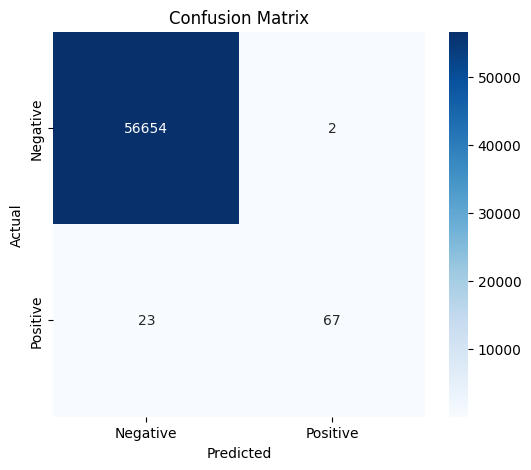

In [ ]:
# Visualizing the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

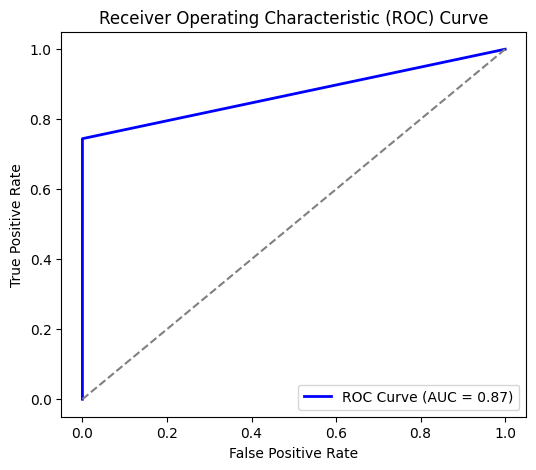

In [ ]:
# Visualizing the ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

<ipython-input-57-14ec611295e7>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metrics_names, y=metrics, palette='Blues')


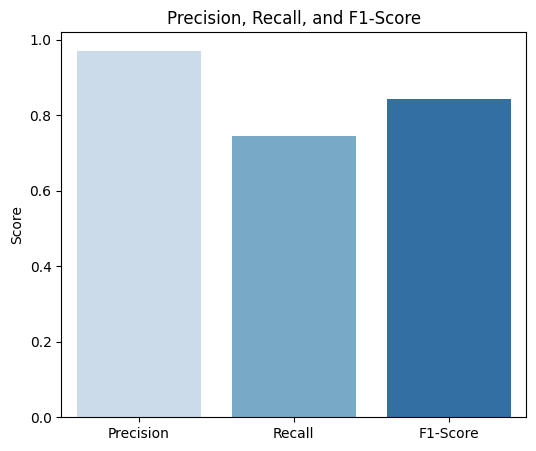

In [ ]:
# Bar plot for Precision, Recall, and F1-Score
metrics = [precision, recall, f1]
metrics_names = ['Precision', 'Recall', 'F1-Score']
plt.figure(figsize=(6, 5))
sns.barplot(x=metrics_names, y=metrics, palette='Blues')
plt.title('Precision, Recall, and F1-Score')
plt.ylabel('Score')
plt.show()


<Figure size 1000x600 with 0 Axes>

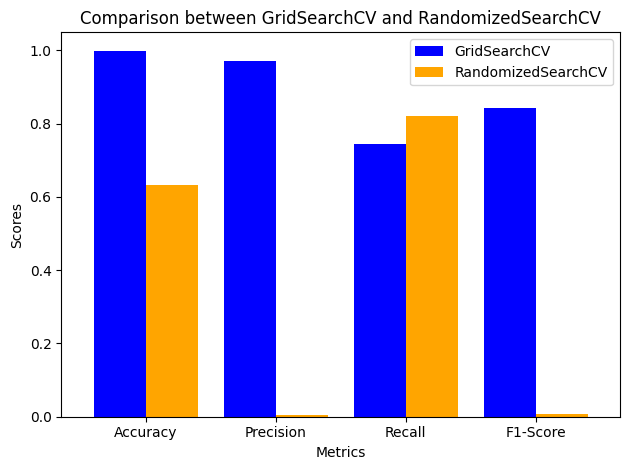

In [ ]:
accuracy_grid = accuracy_score(y_test, voting_clf.predict(X_test_scaled))
precision_grid = precision_score(y_test, voting_clf.predict(X_test_scaled))
recall_grid = recall_score(y_test, voting_clf.predict(X_test_scaled))
f1_grid = f1_score(y_test, voting_clf.predict(X_test_scaled))


accuracy_random = accuracy_score(y_test, random_search_rf.predict(X_test_scaled))
precision_random = precision_score(y_test, random_search_rf.predict(X_test_scaled))
recall_random = recall_score(y_test, random_search_rf.predict(X_test_scaled))
f1_random = f1_score(y_test, random_search_rf.predict(X_test_scaled))


metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']

# Values obtained from GridSearchCV and RandomizedSearchCV
grid_results = [accuracy_grid, precision_grid, recall_grid, f1_grid]
random_results = [accuracy_random, precision_random, recall_random, f1_random]

# Create a DataFrame for comparison
comparison_df = pd.DataFrame({
    'Metrics': metrics,
    'GridSearchCV': grid_results,
    'RandomizedSearchCV': random_results
})

# Set up the plot
plt.figure(figsize=(10, 6))
comparison_df.set_index('Metrics').plot(kind='bar', width=0.8, color=['blue', 'orange'])

# Customize the plot
plt.title('Comparison between GridSearchCV and RandomizedSearchCV')
plt.ylabel('Scores')
plt.xlabel('Metrics')
plt.xticks(rotation=0)
plt.legend(["GridSearchCV", "RandomizedSearchCV"])
plt.tight_layout()

# Show the plot
plt.show()